# IPython Notebook Basics

### Why use IPython notebooks?
* Useful for developing, testing, and sharing results
* Access all of the Python libraries
* Widely used standard outside of physics

### Key Features
* Notebooks are displayed and interfaced with through browser
* Interface is built from cells, which can run code or display markdown
* The files created are text files, which are rendered

### Running IPython Notebook
* Install ipython notebook from a package manager (or where ever)
* Run "ipython notebook" from the terminal
* Following message appears:

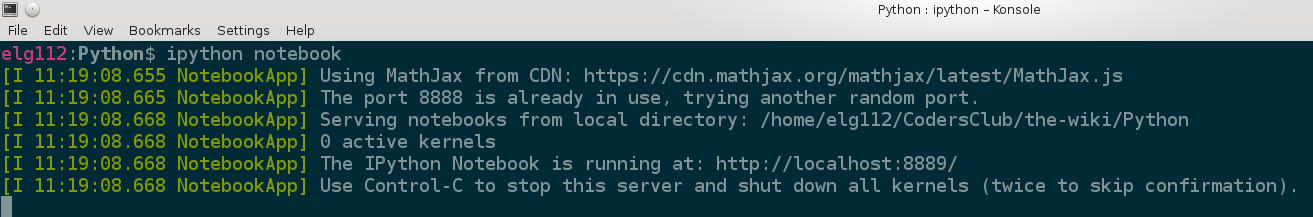

In [1]:
from IPython.display import Image
Image(filename='/home/elg112/CodersClub/the-wiki/Python/ipython_example/opening_ipython.png') 

* Connecting to http:/localhost:8889/ will give you this image

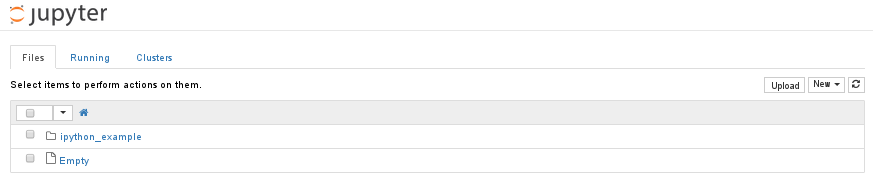

In [2]:
Image(filename='/home/elg112/CodersClub/the-wiki/Python/ipython_example/ipython_welcome_screen.png') 

* This is a file browser, where you can select which notebook you want to open, or make a new one

### Cells
* Cells provide a powerful interface to quickly develop and share code 
* Markdown cells appear as shown, like this cell
* Cells with code, the main functionality, are run one at a time, and "remember" what has happened in other cells
* Their output (if any) is displayed once they are run
* Cells will remember variables set in other cells, or imports from other cells, until reset button is hit

In [3]:
# Example of a cell
a = 10
b = 20
c = a +b
print c

30


In [4]:
print c

30


In [5]:
print a * b

200


* This also holds true for functions, even classes that are defined

In [10]:
def square_my_number(a, print_result=False):
    """
    Square the input number and print the result
    """
    a2 = a * a
    if print_result: 
        print a2

In [11]:
square_my_number(4, print_result=True)

16


# Plotting

* Plotting is very simply in matplotlib, and can be rendered inline with your code, as well as shared inline

Populating the interactive namespace from numpy and matplotlib


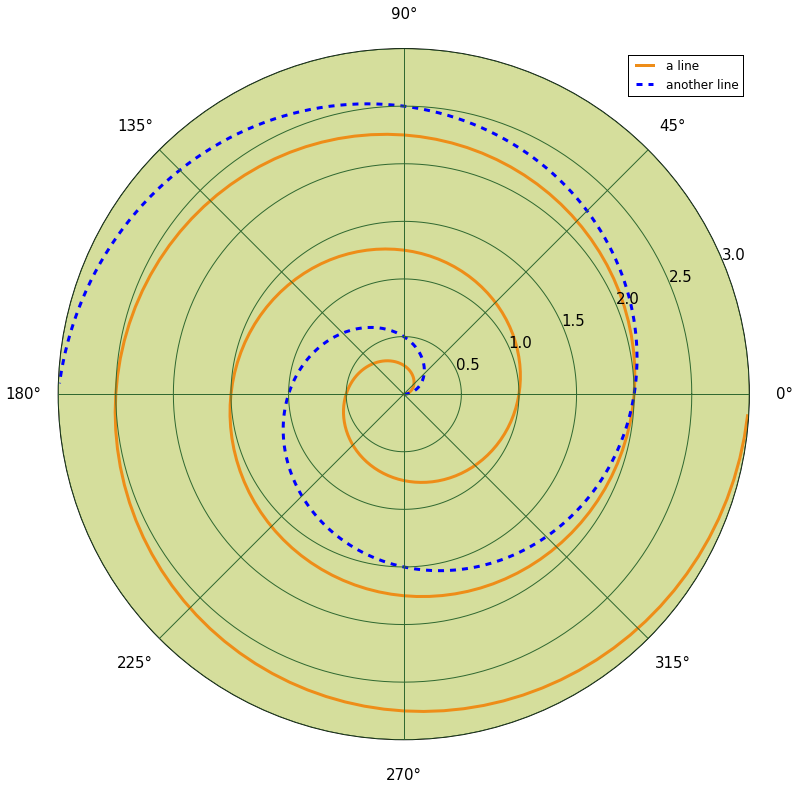

In [12]:
# Numpy is now your best friend.  Learn it well. 
# http://www.numpy.org/
import numpy as np
# Standard plotting package 
from matplotlib.pyplot import figure, show, rc
# Force inline rendering of images
%pylab inline

# radar green, solid grid lines
rc('grid', color='#316931', linewidth=1, linestyle='-')
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
fig = figure(figsize=(12,12))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3, label='a line')
ax.plot(0.5*theta, r, color='blue', ls='--', lw=3, label='another line')
ax.legend()

show()

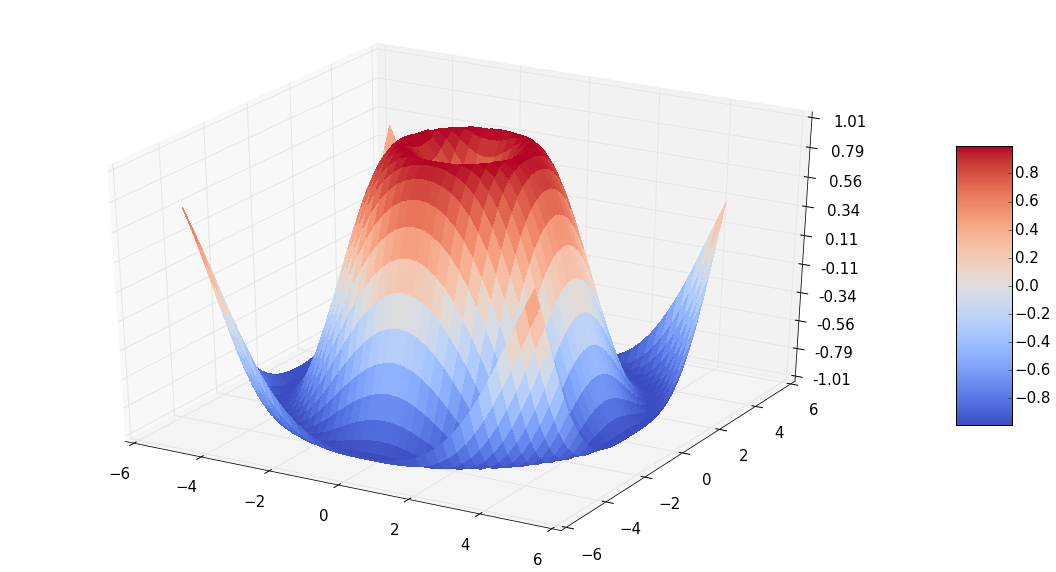

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Use case: Guide for using Sk-Learn with ROOT Files
# NOTE : This part will not run without the input data file

Lets start by importing our new favourite libraries

In [15]:
# This is your next-to-best friend.  There is limited documentation availible. 
# https://pypi.python.org/pypi/root_numpy
# Note: It will not import TClonesArray objects (I think)
from root_numpy import *

## Reading In Data

In [16]:
# Lets read in your first root file.  Note this is loaded into memory
background = root2array("../data/B2Kee_Strip21_BDT_bkg.root", treename="DecayTree")

Here are some things I find useful when I first read in a file:

* Check the branches using dtype, or "Data Type."  All numpy arrays have a defined data type. 

In [17]:
# Names of all the branches
branch_names = background.dtype.names

* Lets do a small demo on slicing and searching arrays

In [18]:
# Print the first 10
print branch_names[0:10] # or just branch_names[:10] for short hand

('B_plus_ENDVERTEX_X', 'B_plus_ENDVERTEX_Y', 'B_plus_ENDVERTEX_Z', 'B_plus_ENDVERTEX_XERR', 'B_plus_ENDVERTEX_YERR', 'B_plus_ENDVERTEX_ZERR', 'B_plus_ENDVERTEX_CHI2', 'B_plus_ENDVERTEX_NDOF', 'B_plus_ENDVERTEX_COV_', 'B_plus_OWNPV_X')


In [19]:
# Print the last 10
print branch_names[-10:] 

('B_plus_M_COD', 'B_plus_M_corr_err', 'B_plus_M_COD_err', 'B_plus_M_track', 'B_plus_M_corr_track', 'B_plus_M_COD_track', 'B_plus_M_corr_track_err', 'B_plus_M_COD_track_err', 'KFold', 'BDTKee0')


In [20]:
# Print every 50th name
print branch_names[::50]

('B_plus_ENDVERTEX_X', 'B_plus_L0Global_TIS', 'B_plus_DTFM_decayLengthErr', 'J_psi_1S_MMERR', 'e_minus_MC12TuneV3_ProbNNghost', 'e_minus_ProbNNe', 'e_minus_TRACK_PZ', 'e_plus_REFPY', 'e_plus_L0HadronDecision_TIS', 'K_Kst_PY', 'K_Kst_L0MuonHighDecision_TIS', 'BDTKee0')


In [21]:
# Print the first 10, but backwards
print branch_names[9::-1]

('B_plus_OWNPV_X', 'B_plus_ENDVERTEX_COV_', 'B_plus_ENDVERTEX_NDOF', 'B_plus_ENDVERTEX_CHI2', 'B_plus_ENDVERTEX_ZERR', 'B_plus_ENDVERTEX_YERR', 'B_plus_ENDVERTEX_XERR', 'B_plus_ENDVERTEX_Z', 'B_plus_ENDVERTEX_Y', 'B_plus_ENDVERTEX_X')


* Okay, now lets check if your names are in there.

In [22]:
# Define a list of names
my_branches = ["B_plus_DIRA_OWNPV",
               "B_plus_PT",
               "B_plus_FDCHI2_OWNPV",
               "B_plus_ENDVERTEX_CHI2",
               "B_plus_IPCHI2_OWNPV",
               "K_Kst_PT",
               "K_Kst_TRACK_CHI2NDOF",
               "K_Kst_IPCHI2_OWNPV",
               "e_plus_TRACK_CHI2NDOF",
               "e_plus_IPCHI2_OWNPV",
               "e_minus_TRACK_CHI2NDOF",
               "e_minus_IPCHI2_OWNPV"]
# Print the total number of branches you want
print "You want " + str(len(my_branches)) + " branches"
print "my_branches is a {}".format(type(my_branches))

# Print the 10th one
print "My 10th branch is " + my_branches[10]

You want 12 branches
my_branches is a <type 'list'>
My 10th branch is e_minus_TRACK_CHI2NDOF


In [23]:
# Check that all these names are also in your branch_names
## To do this, get the set interscation of the two "sets"
common_branches = np.intersect1d(my_branches, branch_names)
# Check the length of its 0th axis (this extends to multidimensional arrays)
print "There are {} common branches".format(common_branches.shape[0])
# Quickly check they are all still there
print common_branches.shape[0] == len(my_branches)

There are 12 common branches
True


* Check where these branches are in the original list

In [24]:
for branch in my_branches:
    # Note we recast branch_names, which is a tuple, into a numpy array to get np.where to work
    index = np.where(np.array(branch_names) == branch)[0][0]
    print "The branch named {} is element number {} in branch_names".format(branch, index)

The branch named B_plus_DIRA_OWNPV is element number 22 in branch_names
The branch named B_plus_PT is element number 24 in branch_names
The branch named B_plus_FDCHI2_OWNPV is element number 21 in branch_names
The branch named B_plus_ENDVERTEX_CHI2 is element number 6 in branch_names
The branch named B_plus_IPCHI2_OWNPV is element number 19 in branch_names
The branch named K_Kst_PT is element number 447 in branch_names
The branch named K_Kst_TRACK_CHI2NDOF is element number 507 in branch_names
The branch named K_Kst_IPCHI2_OWNPV is element number 436 in branch_names
The branch named e_plus_TRACK_CHI2NDOF is element number 404 in branch_names
The branch named e_plus_IPCHI2_OWNPV is element number 333 in branch_names
The branch named e_minus_TRACK_CHI2NDOF is element number 292 in branch_names
The branch named e_minus_IPCHI2_OWNPV is element number 221 in branch_names


Okay, enough playing around.  Lets be smart about this
## Reading in Data the Smart Way

In [25]:
#Lets only use the branches we want.  Redfining background will suffice
background = root2array("../data/B2Kee_Strip21_BDT_bkg.root", treename="DecayTree", branches=my_branches)
signal = root2array("../data/B2Kee_Strip21_BDT_sig.root", treename="DecayTree", branches=my_branches)

In [26]:
# Now we only have the things we need in memory.  Good.
print background.dtype.names

('B_plus_DIRA_OWNPV', 'B_plus_PT', 'B_plus_FDCHI2_OWNPV', 'B_plus_ENDVERTEX_CHI2', 'B_plus_IPCHI2_OWNPV', 'K_Kst_PT', 'K_Kst_TRACK_CHI2NDOF', 'K_Kst_IPCHI2_OWNPV', 'e_plus_TRACK_CHI2NDOF', 'e_plus_IPCHI2_OWNPV', 'e_minus_TRACK_CHI2NDOF', 'e_minus_IPCHI2_OWNPV')


In [27]:
# Lets look at a feature
print background['B_plus_DIRA_OWNPV']

[ 0.99952648  0.99992512  0.99989577 ...,  0.99984521  0.99999972
  0.99997523]


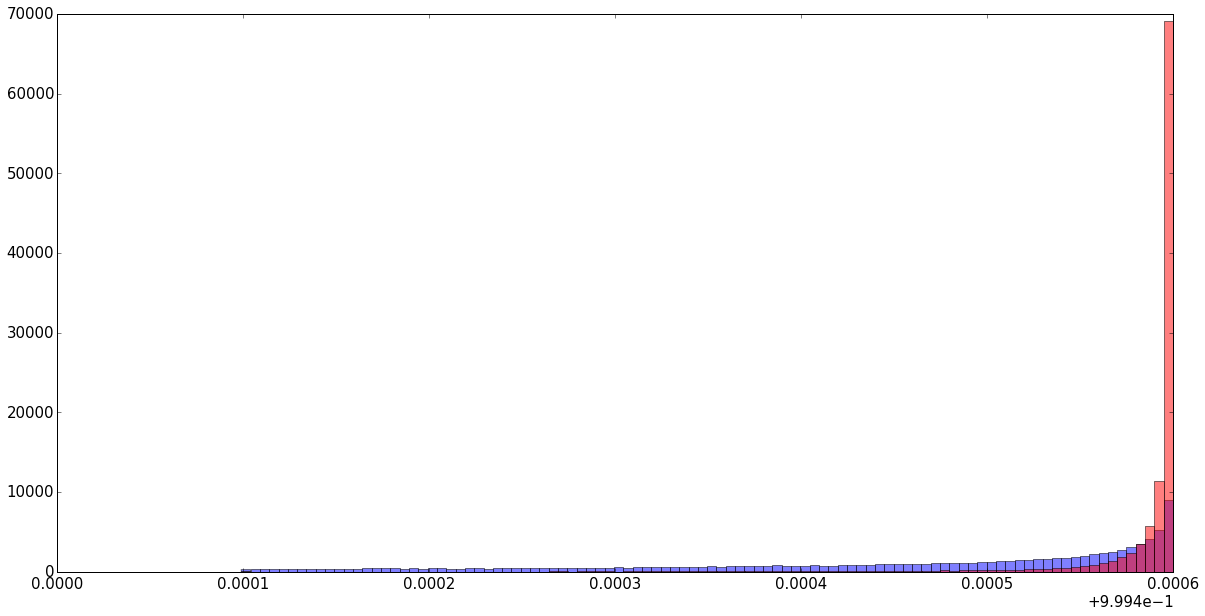

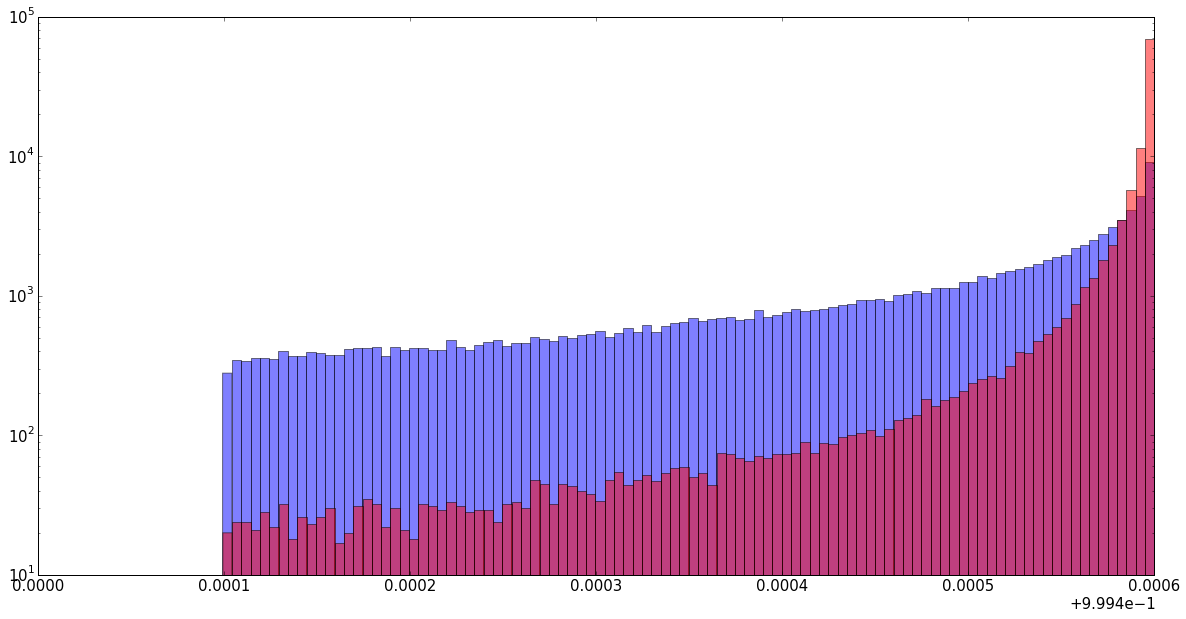

In [30]:
# Maybe a histogram?
figsize(20,10)
plt.hist(background['B_plus_DIRA_OWNPV'],bins=100, alpha=0.5)
plt.hist(signal['B_plus_DIRA_OWNPV'],bins=100, alpha=0.5, color="Red")
show()
# Log plot?
plt.hist(background['B_plus_DIRA_OWNPV'],bins=100, alpha=0.5, log=True)
plt.hist(signal['B_plus_DIRA_OWNPV'],bins=100, alpha=0.5, color="Red", log=True)
show()

In [31]:
# Lets look at an event
event = 10
print background[event]

(0.999931036518474, 2015.3684637058307, 8176.88842444518, 1.2551888227462769, 14.54242649320658, 2103.651700923896, 0.8330703377723694, 13.172111192909124, 0.7725345492362976, 9.389836840169808, 1.1667531728744507, 15.591578476356897)


In [32]:
# Well that was confusing.  Lets name these values by
# iterating over the names and the values together using
# zip()
for value, name in zip(background[event], background.dtype.names):
    print name, value

B_plus_DIRA_OWNPV 0.999931036518
B_plus_PT 2015.36846371
B_plus_FDCHI2_OWNPV 8176.88842445
B_plus_ENDVERTEX_CHI2 1.25518882275
B_plus_IPCHI2_OWNPV 14.5424264932
K_Kst_PT 2103.65170092
K_Kst_TRACK_CHI2NDOF 0.833070337772
K_Kst_IPCHI2_OWNPV 13.1721111929
e_plus_TRACK_CHI2NDOF 0.772534549236
e_plus_IPCHI2_OWNPV 9.38983684017
e_minus_TRACK_CHI2NDOF 1.16675317287
e_minus_IPCHI2_OWNPV 15.5915784764


## Defining our features

In [33]:
# Lets get this into a more usable format via an OrderedDictionary
# This is similar to a C++ map, mapping from keys to values
from collections import OrderedDict
features = OrderedDict()

In [34]:
# This will remember the order in which the features are added.  Lets add the first feature manually
print background.dtype.names[0]

B_plus_DIRA_OWNPV


In [35]:
# We are going to combine the background and signal samples here
print background["B_plus_DIRA_OWNPV"].shape[0]
print signal["B_plus_DIRA_OWNPV"].shape[0]
# Stack these horizontally, i.e. back to back on one axis
# Note the branch name is defined as out key below, and new stacked array is its value
features["B_plus_DIRA_OWNPV"] = np.hstack([background["B_plus_DIRA_OWNPV"], signal["B_plus_DIRA_OWNPV"]]) 
print features["B_plus_DIRA_OWNPV"].shape[0]

101004
106320
207324


In [36]:
# We can automate this a bit
for name in background.dtype.names:
    features[name] = np.hstack([background[name], signal[name]])
# Print the keys to check they are all there
print features.keys()
# Check the lengths of all the values to make sure they are the same
for value in features.values():
    print value.shape[0]

['B_plus_DIRA_OWNPV', 'B_plus_PT', 'B_plus_FDCHI2_OWNPV', 'B_plus_ENDVERTEX_CHI2', 'B_plus_IPCHI2_OWNPV', 'K_Kst_PT', 'K_Kst_TRACK_CHI2NDOF', 'K_Kst_IPCHI2_OWNPV', 'e_plus_TRACK_CHI2NDOF', 'e_plus_IPCHI2_OWNPV', 'e_minus_TRACK_CHI2NDOF', 'e_minus_IPCHI2_OWNPV']
207324
207324
207324
207324
207324
207324
207324
207324
207324
207324
207324
207324


In [37]:
# Now lets add some labels, 0 for background event, 1 for signal
features["labels"] = np.hstack([np.zeros(background.shape[0]), np.ones(signal.shape[0])])
print features["labels"].shape[0]

207324


## Defining Our Sample

In [38]:
# We need to split our sample into testing and training
# This will randomly generate two sets of indexes in a given range
from sklearn.cross_validation import train_test_split

train_samp, test_samp = train_test_split(range(len(features["labels"])), train_size=0.3, test_size=0.3)
print train_samp[:10]
print test_samp[:10]

[91642, 204427, 118098, 65925, 162446, 20919, 7758, 62951, 140733, 183245]
[82776, 73875, 128628, 15004, 40422, 66580, 92199, 71156, 90848, 69043]


In [39]:
# Okay, from here we can make a nice pandas data frame
import pandas
# Stack the data into one array
all_values = np.vstack(features.values())
print all_values.shape
# Take transpose so its [n_events x n_features] in shape
all_values = all_values.T
print all_values.shape
# Define the data frame
train_data = pandas.DataFrame(data=all_values[train_samp], columns=features.keys())
test_data = pandas.DataFrame(data=all_values[test_samp], columns=features.keys())

(13, 207324)
(207324, 13)


In [40]:
# Now we can get pretty tables
train_data[0:10]

,B_plus_DIRA_OWNPV,B_plus_PT,B_plus_FDCHI2_OWNPV,B_plus_ENDVERTEX_CHI2,B_plus_IPCHI2_OWNPV,K_Kst_PT,K_Kst_TRACK_CHI2NDOF,K_Kst_IPCHI2_OWNPV,e_plus_TRACK_CHI2NDOF,e_plus_IPCHI2_OWNPV,e_minus_TRACK_CHI2NDOF,e_minus_IPCHI2_OWNPV,labels
0,1.000000,165.955032,150803.628122,9.675350,0.516476,1623.988687,0.841206,4.009757,1.836701,43.818190,1.133201,98.846551,0
1,0.999999,15717.462458,12279.754088,0.226812,4.478734,9899.570601,1.736055,582.800370,0.907352,2520.227775,1.023807,3585.384686,1
2,1.000000,4550.398976,38521.442268,5.463949,1.463871,1117.968555,0.596807,774.774787,1.465243,1394.023203,0.808839,24.493097,1
3,0.999749,3280.433934,168.900905,3.112839,7.266684,4157.627222,0.593471,10.869689,0.742405,75.759676,0.855882,70.750598,0
4,0.999995,8257.730055,3824.061115,5.213842,1.655334,2267.928783,1.100754,2024.204386,1.749256,771.530606,1.931613,326.125557,1
5,0.999762,6030.776548,122.913798,6.372472,7.935801,6446.280403,1.384463,4.510620,2.708444,10.056005,2.383561,111.167772,0
6,0.999849,5710.425741,198.979199,14.802169,9.173644,478.634647,1.046974,15.297565,1.302722,160.230549,2.124681,37.496892,0
7,0.999917,2642.705517,193.709473,11.192376,7.606804,4012.133739,1.035509,8.384250,1.316577,43.515324,1.023489,128.396869,0
8,0.999992,7115.766306,3285.497278,7.372045,2.520247,4173.771735,1.274803,847.578575,1.658815,890.454375,1.092752,935.610779,1
9,0.999963,5667.925137,597.471619,4.850715,7.060321,858.168910,0.729015,165.866560,1.267964,241.488159,1.020356,141.834170,1


In [41]:
test_data[0:10]

,B_plus_DIRA_OWNPV,B_plus_PT,B_plus_FDCHI2_OWNPV,B_plus_ENDVERTEX_CHI2,B_plus_IPCHI2_OWNPV,K_Kst_PT,K_Kst_TRACK_CHI2NDOF,K_Kst_IPCHI2_OWNPV,e_plus_TRACK_CHI2NDOF,e_plus_IPCHI2_OWNPV,e_minus_TRACK_CHI2NDOF,e_minus_IPCHI2_OWNPV,labels
0,0.999753,2148.785691,512.810388,16.673729,16.558199,2643.799258,1.281285,9.372552,1.073378,17.528796,1.574548,457.749793,0
1,0.999968,3671.304408,7280.634178,6.386254,18.153685,936.983603,1.383310,1030.057724,1.186880,49.900066,0.982579,112.234009,0
2,1.000000,13699.006499,2004.024987,2.817837,0.501820,6448.691112,0.692973,340.461712,1.121320,1054.913157,1.188860,128.951862,1
3,0.999989,426.228530,7727.614376,3.209021,9.427943,1820.139673,0.536428,132.909032,0.831128,20.487990,1.318507,5898.591008,0
4,0.999995,802.639047,70825.188485,9.844437,12.362965,1705.205844,1.084802,22.349775,0.687474,15.175751,0.711187,12.008370,0
5,0.999806,3235.299717,268.438142,25.605017,20.998608,4075.611907,1.799163,28.998801,2.192683,76.251382,1.263454,161.779037,0
6,0.999619,1794.842227,1309.679298,13.636506,14.686566,895.586395,0.838530,5.330062,0.876166,13.803404,1.578910,9.825203,0
7,0.999874,3386.278357,1128.746028,8.838452,5.647010,4103.709694,0.847106,95.979780,1.875565,37.214310,1.168728,10.600902,0
8,0.999628,1981.172013,229.213046,9.144643,7.436196,2252.772636,1.068916,88.234452,0.597306,115.939358,1.311627,29.919631,0
9,0.999660,2297.015532,176.226610,3.211263,10.108359,2746.077456,1.321443,4.607003,1.104531,147.131783,1.237036,17.159559,0


## Lets do some machine learning!

In [42]:
# This is my favourite classifier ever
from sklearn.ensemble import GradientBoostingClassifier

gbdt_class_200 = GradientBoostingClassifier(n_estimators=200)
gbdt_class_400 = GradientBoostingClassifier(n_estimators=400)

In [43]:
# This is the training step
gbdt_class_200.fit(train_data[my_branches], train_data["labels"])
gbdt_class_400.fit(train_data[my_branches], train_data["labels"])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=400,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
# This is the testing step
# Note this gives two values for each event, 
# probability of background and probabiltiy of signal.  
predict_200 = gbdt_class_200.predict_proba(test_data[my_branches])
predict_400 = gbdt_class_400.predict_proba(test_data[my_branches])
print predict_200.shape
# Lets take all events, second value using [:,1] to get probability of signal
predict_200 = predict_200[:,1]
predict_400 = predict_400[:,1]
print predict_200.shape

(62198, 2)
(62198,)


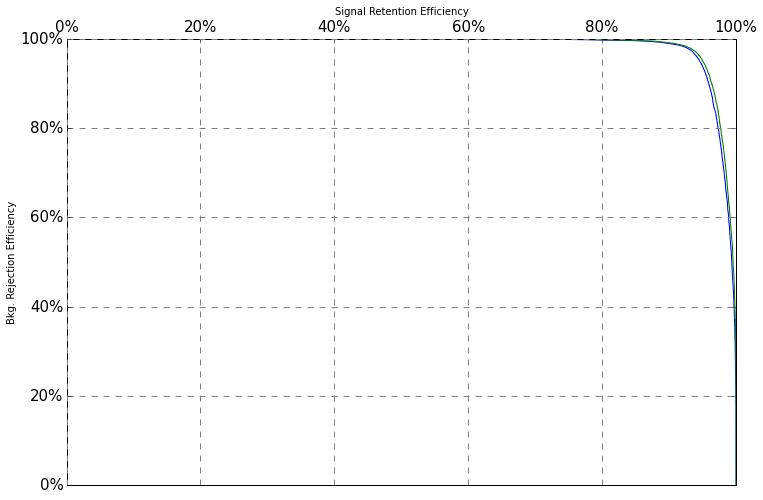

In [45]:
# Okay, lets look at our roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick

# Define out figure or "canvas"
figsize(12,8)
fig = plt.figure(1)

for pred in [predict_200, predict_400]:
    # Define our axes or "TF1"
    ax = fig.add_subplot(111)

    fpr, tpr, values = roc_curve(test_data["labels"], pred)
    fpr *= 100.
    tpr *= 100.
    ax.xaxis.tick_top()
    ax.set_xlabel('Signal Retention Efficiency', fontsize=10)
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel('Bkg. Rejection Efficiency', fontsize=10)    
    ax.plot(tpr, 100-fpr)
    ax.grid(b=True, which='minor', color='grey', linestyle=':')
    ax.grid(b=True, which='major', color='grey', linestyle='--')


    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax.xaxis.set_major_formatter(xticks)
    ax.yaxis.set_major_formatter(xticks)